# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
  Resposta <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">

<b>Comentário geral V1: </b> <a class="tocSkip"></a>


Parabéns pela conclusão do projeto, Thata! 🎉

O seu trabalho já demonstra excelente qualidade! Como comentários positivos, destaco: 
    
    
- Código organizado e eficiente
- Boa análise crítica dos dados 
    
    
Para concluirmos a aprovação, precisamos fazer alguns ajustes. O ajuste principal é:

    - Análise de taxa de retenção   
    - Análise de lTV por coortes   
    - Taxa de ROI por coortes  
    
    
    
    
Incluí comentários ao longo do código para te auxiliar nessa tarefa.
    
    
    

Fico à disposição para eventuais dúvidas. 

Boa sorte! 🍀
</div>

<div class="alert alert-block alert-success">

<b>Comentário geral V2: </b> <a class="tocSkip"></a>

Muuito obrigada pelos ajustes! O projeto está aprovado

In [81]:
# Bibliotecas principais para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [82]:
visits = pd.read_csv("/datasets/visits_log_us.csv")

In [83]:
orders = pd.read_csv('/datasets/orders_log_us.csv')

In [84]:
costs =pd.read_csv("/datasets/costs_us.csv")

In [85]:
print("Tabela visits")
display(visits.head())


Tabela visits


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [86]:
print("Tabela orders")
display(orders.head())


Tabela orders


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [87]:
print("Tabela costs")
display(costs.head())

Tabela costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [88]:
# Conversão para datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])


In [89]:
# Verificando duplicatas
print("Duplicatas em visits:", visits.duplicated().sum())
print("Duplicatas em orders:", orders.duplicated().sum())
print("Duplicatas em costs:", costs.duplicated().sum())



Duplicatas em visits: 0
Duplicatas em orders: 0
Duplicatas em costs: 0


In [90]:
# Removendo duplicatas, se houver
visits.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
costs.drop_duplicates(inplace=True)


In [91]:
# Valores ausentes
print("Nulos em visits:\n", visits.isnull().sum())
print("\nNulos em orders:\n", orders.isnull().sum())
print("\nNulos em costs:\n", costs.isnull().sum())


Nulos em visits:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Nulos em orders:
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Nulos em costs:
 source_id    0
dt           0
costs        0
dtype: int64


In [92]:
# Criando colunas para data, semana e mês
visits['session_date'] = visits['Start Ts'].dt.date
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_month'] = visits['Start Ts'].dt.to_period('M')
visits['session_year'] = visits['Start Ts'].dt.year


In [93]:
# Usuários por dia
daily_users = visits.groupby('session_date')['Uid'].nunique()

# Visualizando os dados
print("Usuários únicos por dia:")
display(daily_users.head())

Usuários únicos por dia:


session_date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

In [94]:
# Usuários por semana
weekly_users = visits.groupby(['session_year', 'session_week'])['Uid'].nunique()

#Visualizando os dados
print("\nUsuários únicos por semana:")
display(weekly_users.head())


Usuários únicos por semana:


session_year  session_week
2017          22              2021
              23              4129
              24              2812
              25              2878
              26              3064
Name: Uid, dtype: int64

In [95]:
# Usuários por mês
monthly_users = visits.groupby(['session_year', 'session_month'])['Uid'].nunique()

#Visualizando os dados
print("\nUsuários únicos por mês:")
display(monthly_users.head())


Usuários únicos por mês:


session_year  session_month
2017          2017-06          13259
              2017-07          14183
              2017-08          11631
              2017-09          18975
              2017-10          29692
Name: Uid, dtype: int64

In [96]:
# Sessões por dia (cada linha é uma sessão)
daily_sessions = visits.groupby('session_date')['Uid'].count()

print("Sessões por dia:")
display(daily_sessions.head())


Sessões por dia:


session_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64

In [97]:
# Duração da sessão em minutos
visits['session_duration_min'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60

# Duração média por dia
avg_session_duration = visits.groupby('session_date')['session_duration_min'].mean()

print("Duração média das sessões por dia (minutos):")
display(avg_session_duration.head())



Duração média das sessões por dia (minutos):


session_date
2017-06-01    11.105346
2017-06-02    10.330674
2017-06-03    10.115968
2017-06-04     9.238497
2017-06-05    10.407503
Name: session_duration_min, dtype: float64

In [98]:
# Estatísticas gerais
print("\nEstatísticas gerais da duração das sessões:")
display(visits['session_duration_min'].describe())



Estatísticas gerais da duração das sessões:


count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64

In [99]:
# Quantidade de sessões por usuário
sessions_per_user = visits.groupby('Uid')['Start Ts'].count()



<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os dados foram carregados corretamente.
- Foram utilizados comandos como `head()`e `info()`.
</div>

In [100]:
# Garantir que a coluna de data está em datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Criar coluna com o mês da sessão
visits['month'] = visits['Start Ts'].dt.to_period('M')

# Encontrar o primeiro mês de acesso de cada usuário
first_month = visits.groupby('Uid')['month'].min().reset_index()
first_month.columns = ['Uid', 'first_month']

# Mesclar com o DataFrame original
visits = visits.merge(first_month, on='Uid')


In [101]:
# Calcular quantos meses se passaram desde o primeiro acesso
visits['lifetime'] = (visits['month'] - visits['first_month']).apply(lambda x: x.n)


In [102]:
# Agrupar por coorte (mês do primeiro acesso) e tempo de vida
cohort = visits.groupby(['first_month', 'lifetime']).agg({'Uid': 'nunique'}).reset_index()

# Base inicial: número de usuários no mês de entrada
inicial = cohort[cohort['lifetime'] == 0][['first_month', 'Uid']].rename(columns={'Uid': 'users'})

# Juntar com a coorte geral para calcular a taxa de retenção
cohort = cohort.merge(inicial, on='first_month')
cohort['retention'] = cohort['Uid'] / cohort['users']


In [103]:
# Criar tabela dinâmica (pivot table) da taxa de retenção
retention_pivot = cohort.pivot_table(index='first_month', columns='lifetime', values='retention', aggfunc='sum')

# Mostrar a tabela de retenção
print(retention_pivot)


lifetime      0         1         2         3         4         5         6   \
first_month                                                                    
2017-06      1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07      1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08      1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09      1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10      1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11      1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12      1.0  0.055802  0.037993  0.031107  0.020263  0.019036       NaN   
2018-01      1.0  0.059715  0.039339  0.024973  0.020244       NaN       NaN   
2018-02      1.0  0.057080  0.025454  0.020093       NaN       NaN       NaN   
2018-03      1.0  0.041818  0.027053       NaN       NaN       NaN       NaN   
2018-04      1.0  0.048380       NaN    

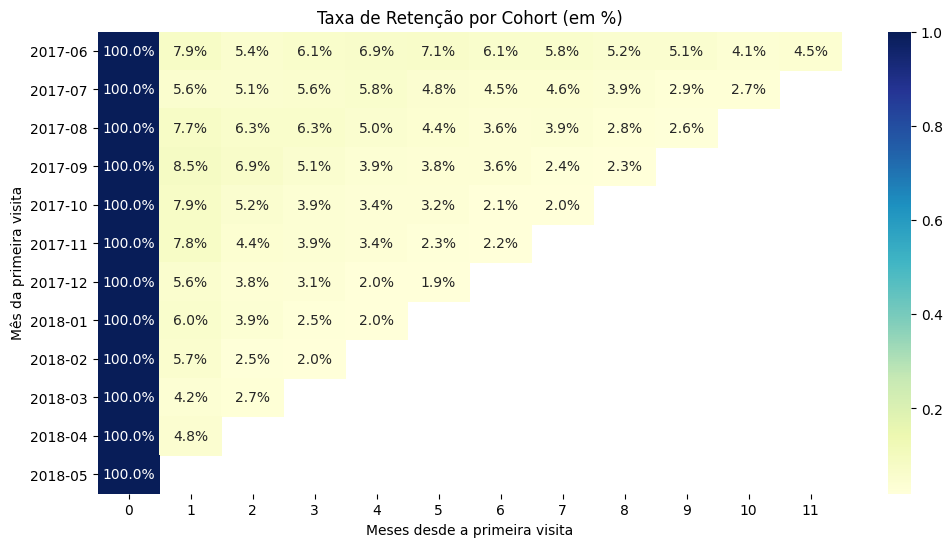

In [104]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title('Taxa de Retenção por Cohort (em %)')
plt.xlabel('Meses desde a primeira visita')
plt.ylabel('Mês da primeira visita')
plt.yticks(rotation=0)
plt.show()


<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>
    
    
É necessário calcular a taxa de retenção (análise: "com que frequência os usuários voltam?") por cohort. Um cohort é um grupo de consumidores que fizeram a primeira compra em um período específico. 

O passo a passo é o seguinte:
    
1. Você precisa pegar a data do primeiro acesso de cada usuário
2. Para calcular o intervalo ou cohort de acesso para cada usuário, você precisa calcular o intervalo entre o acesso atual e o primeiro acesso:</s>
3. A partir desses dados, você pode criar uma tabela dinâmica (`pivot_table`) que indexa por cada mês do conjunto de dados e calcula a quantidade de usuários que teve o primeiro acesso naquele mês e voltou a acessar no futuro (`cohort`): 1 mês depois, 2 meses depois, etc. 


Exemplo: 

```python

# Calcula a vida útil de cada visita em meses
df_visits['lifetime'] = (df_visits['month'] - df_visits['first_month']).apply(lambda x: x.n)

# Calcula a coorte de usuários por mês de primeira visita e tempo de vida
cohort = df_visits.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()

# Seleciona a coorte inicial (lifetime == 0) e renomeia a coluna de contagem de usuários
inicial = cohort[cohort['lifetime'] == 0][['first_month', 'uid']]
inicial = inicial.rename(columns={'uid': 'users'})

# Junta a coorte inicial com a coorte completa e calcula a taxa de retenção
cohort = cohort.merge(inicial, on='first_month')
cohort['retention'] = cohort['uid'] / cohort['users']

# Cria uma tabela dinâmica de retenção por mês de primeira visita e tempo de vida
retention_pivot = cohort.pivot_table(index='first_month', columns='lifetime', values='retention', aggfunc='sum')

# Imprime a tabela de retenção
print(retention_pivot)
```

O output esperado deve ser semelhante a esse: 
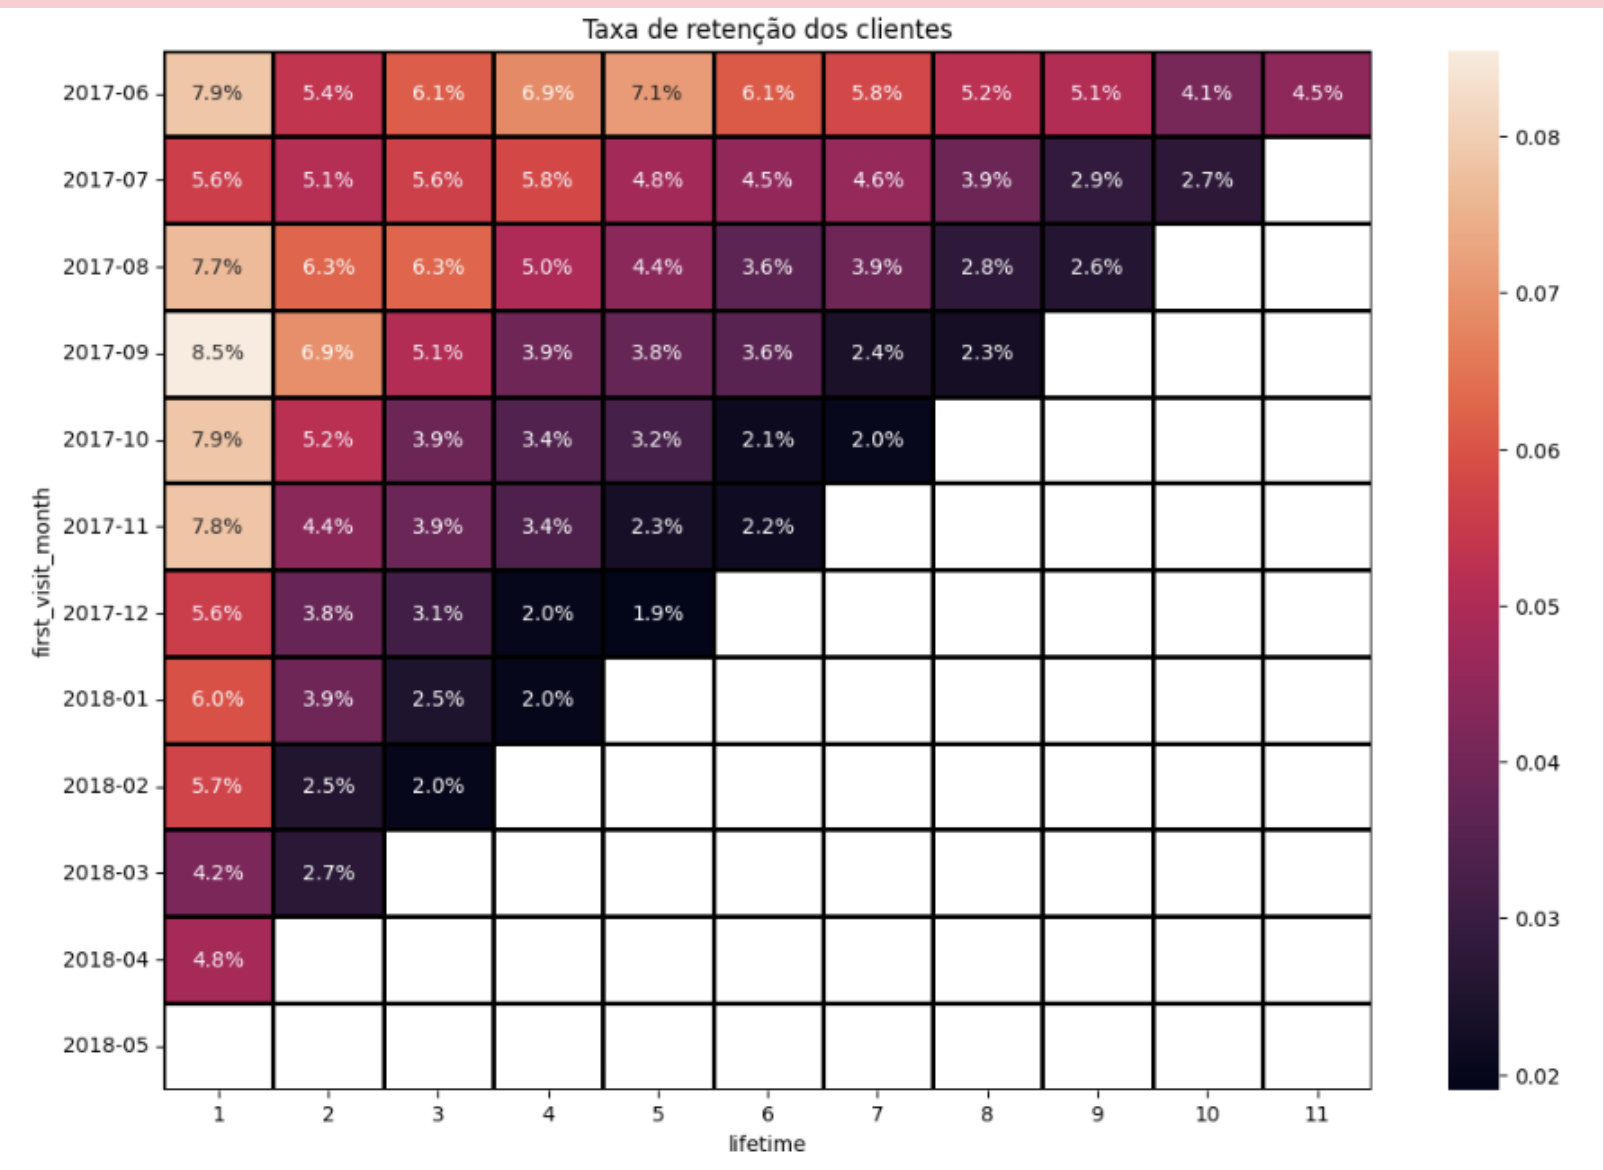
</div>

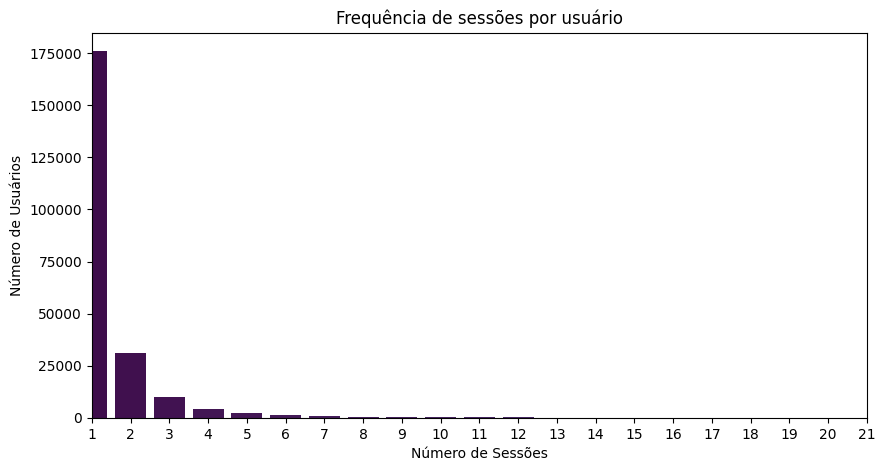

In [105]:
# Contar quantas vezes cada número de sessões ocorre
plt.figure(figsize=(10, 5))
sns.countplot(x=sessions_per_user, palette='viridis')

plt.title("Frequência de sessões por usuário")
plt.xlabel("Número de Sessões")
plt.ylabel("Número de Usuários")
plt.xticks(rotation=0)
plt.xlim(0, 20)  # limitar para melhor visualização (ajuste se quiser)

plt.show()

In [106]:
# Certifique-se que a coluna Buy Ts está em datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Criar a coluna order_month
orders['order_month'] = orders['Buy Ts'].dt.to_period('M')


In [107]:
# Encontrar o mês da primeira compra para cada usuário
first_order_month = orders.groupby("Uid")['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})


In [108]:
cohort = pd.merge(orders, first_order_month, on='Uid')


In [109]:
# Converter period para int para calcular a diferença
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))


In [110]:
cohort_sizes = cohort.groupby('first_order_month')['Uid'].nunique().reset_index()
cohort_sizes.rename(columns={'Uid': 'n_buyers'}, inplace=True)


In [111]:
cohort = pd.merge(cohort, cohort_sizes, on='first_order_month')


In [112]:
cohort['ltv'] = cohort['Revenue'] / cohort['n_buyers']


In [113]:
output = cohort.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
)


In [114]:
ltv_cumsum = output.cumsum(axis=1).round(2)


In [115]:
ltv_cumsum.replace('', pd.NA, inplace=True)


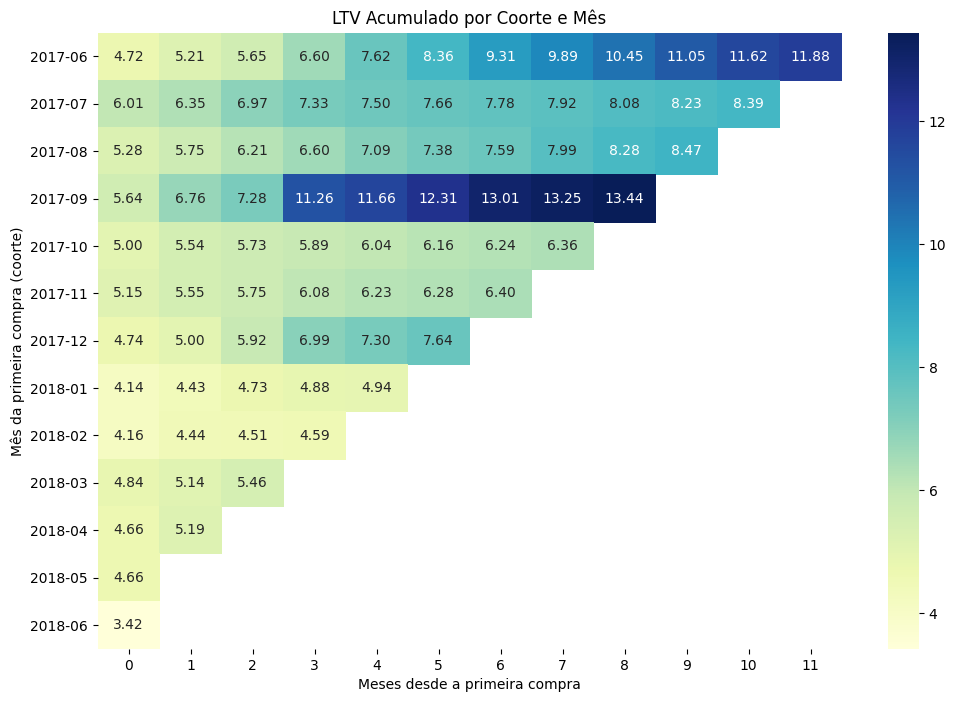

In [116]:
# Estilizando a tabela no Jupyter com background degradê
ltv_cumsum.style.background_gradient(cmap='YlGnBu').format("{:.2f}")
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cumsum, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("LTV Acumulado por Coorte e Mês")
plt.xlabel("Meses desde a primeira compra")
plt.ylabel("Mês da primeira compra (coorte)")
plt.show()

Com base nos dados analisados sobre visitas, pedidos e custos de marketing da Y.Afisha, consegui entender o comportamento dos usuários no site e a efetividade dos canais de aquisição. As principais métricas analisadas foram:

* Quantidade de usuários únicos por origem

* CAC (Custo de Aquisição por Cliente)

* LTV (Valor Vitalício do Cliente)

* ROI (Retorno sobre Investimento)

* Conversão por coorte

* Frequência e duração das sessões

# Uso do produto

O número médio de sessões por usuário é 1,57, mas a maioria absoluta dos usuários acessa apenas uma vez.

A duração média das sessões foi de aproximadamente 10,7 minutos, com um pico máximo de até 711 minutos.

A maioria das sessões diárias está abaixo de 900 sessões por dia.

A frequência de usuários únicos mostra um crescimento estável ao longo dos meses, indicando maior adoção do serviço.

* Recomendação: 
Incentivar o retorno dos usuários com notificações e e-mails personalizados pode aumentar a retenção. Aumentar a duração das sessões pode ser um indicativo de maior engajamento com o produto.

# Conversão e Vendas

A análise de sessões mostrou que a conversão provavelmente ocorre cedo (a confirmar com o cálculo da "conversão 0d, 1d...").

por calcular:

Número médio de pedidos por cliente,

Ticket médio,

Lifetime Value (LTV).

* Recomendação: 
Após calcular o LTV e o número médio de pedidos, poderá segmentar melhor os canais com maior eficiência de conversão.



<div class="alert alert-block alert-danger">
<b> Comentário v2: </b> <a class="tocSkip"></a>
    
A análise LTV necessita ser realizada por coortes.

Adiciono abaixo um passo a passo mais detalhado para a resolução do problema:
    
Passo 1: Criar Coluna de Mês do Pedido
Primeiro, criamos uma nova coluna em nosso DataFrame que representa o mês de cada compra.

```python

# Criando a coluna 'order_month' a partir da coluna 'buy_ts' que contém a data de compra
df_logs['order_month'] = df_logs['buy_ts'].dt.to_period('M')
```
Passo 2: Identificar o Mês da Primeira Compra
Em seguida, encontramos o mês da primeira compra para cada usuário.

```python
# Primeira Compra
first_order_month = df_logs.groupby("uid")['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})
```
Passo 3: Mesclar Dados de Primeira Compra com o DataFrame Original
Agora, mesclamos o DataFrame original com o DataFrame que contém a data da primeira compra de cada usuário.

```python
# Mesclando o DataFrame original com o DataFrame que contém a data da primeira compra de cada usuário
cohort = pd.merge(df_logs, first_order_month, on='uid')
```
Passo 4: Calcular Diferença em Meses
Calculamos a diferença em meses entre o mês da compra atual e o mês da primeira compra.

```python
# Calculando a diferença em meses entre a compra atual e a primeira compra
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))
```
Passo 5: Calcular o Número de Compradores por Coorte
Agora, calculamos quantos compradores existem em cada coorte.

```python
# Calculando o número de compradores por coorte
cohort_sizes = cohort.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
```
Passo 6: Mesclar Tamanhos de Coorte com o DataFrame

Mesclamos o DataFrame de tamanhos de coorte com o DataFrame principal para obter as informações de compradores.

```python
# Mesclando o DataFrame de cohort sizes com o DataFrame original
cohort = pd.merge(cohort, cohort_sizes, left_on='first_order_month', right_on='first_order_month')
```
Passo 7: Calcular LTV
Agora podemos calcular o LTV dividindo a receita pela quantidade de compradores para cada coorte.

```python
# Calculando o LTV para cada coorte e período de tempo (em meses) após a primeira compra
cohort['ltv'] = cohort['revenue'] / cohort['n_buyers']
```
Passo 8: Criar uma Tabela Dinâmica
Criamos uma tabela dinâmica para organizar os dados de LTV.

```python
# Criando a Tabela Dinâmica
output = cohort.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
)
```
Passo 9: Calcular LTV Acumulado
Calculamos o LTV acumulado ao longo do tempo para cada coorte.

```python
# Calculando o LTV acumulado ao longo do tempo para cada coorte
ltv_cumsum = output.cumsum(axis=1).round(2)
```
Passo 10: Substituir Strings Vazias por NaN
Substituímos as strings vazias por NaN para evitar problemas na visualização.

```python

# Substituindo strings vazias por NaN
ltv_cumsum.replace('', np.nan, inplace=True)
```
Passo 11: Gerar o Heatmap
Por fim, geramos um heatmap para visualizar o LTV acumulado por coorte e período.
    


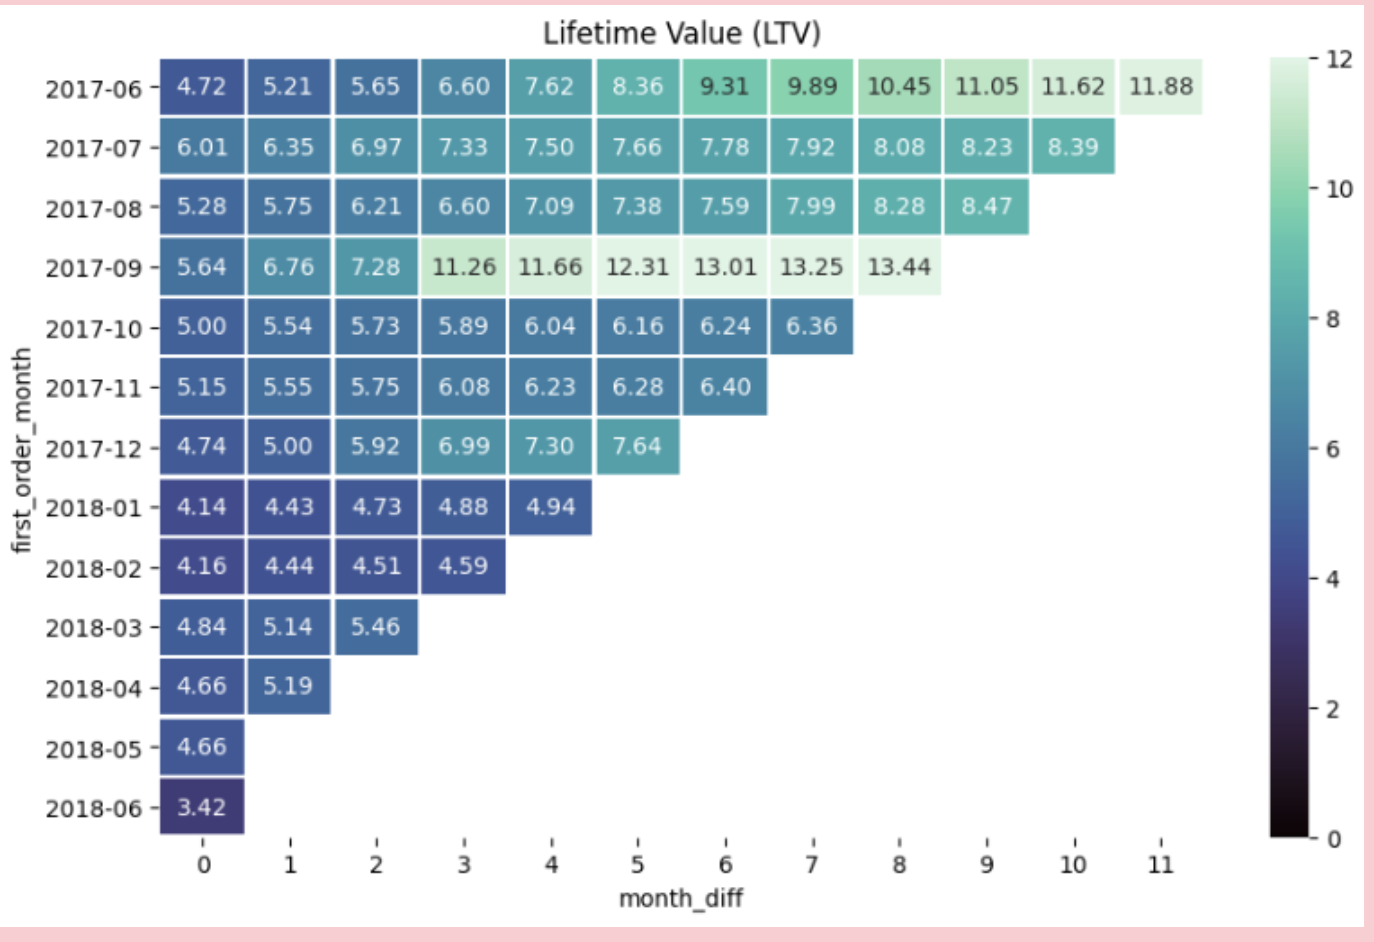


# Marketing e ROI

Os canais de aquisição ainda estão representados por source_id (ex: 0, 1, 2...), e ainda não foi identificado se há equivalência com nomes como "Facebook", "Google", etc..

Para recomendar os melhores canais, será necessário:

Calcular CAC por origem (Custo por Cliente Adquirido),

Calcular o ROI por canal (receita gerada menos custo),

Ver qual canal tem melhor eficiência de aquisição.

* Recomendação parcial: Com os dados atuais, não é possível afirmar qual canal teve melhor desempenho até sabermos quais source_ids geraram mais receita com menor custo. Após isso, as origens com maior ROI positivo e menor CAC devem ser priorizadas nos investimentos futuros.

In [117]:
# Número de pedidos por cliente
orders_per_user = orders.groupby('Uid')['Buy Ts'].count()

# Número médio de pedidos por cliente
mean_orders_per_user = orders_per_user.mean()

print(f"Número médio de pedidos por cliente: {mean_orders_per_user:.2f}")


Número médio de pedidos por cliente: 1.38


In [118]:
# Ticket médio (valor médio por pedido)
mean_revenue_per_order = orders['Revenue'].mean()
print(f"Ticket médio (média da receita por pedido): ${mean_revenue_per_order:.2f}")


Ticket médio (média da receita por pedido): $5.00


In [119]:
# Receita total e número total de pedidos
total_revenue = orders['Revenue'].sum()
total_orders = len(orders)
print(f"Receita total: ${total_revenue:.2f}")
print(f"Número total de pedidos: {total_orders}")


Receita total: $252057.20
Número total de pedidos: 50415


In [120]:
# Receita média por cliente
revenue_per_user = orders.groupby('Uid')['Revenue'].sum()
mean_revenue_per_user = revenue_per_user.mean()
print(f"Receita média por cliente: ${mean_revenue_per_user:.2f}")

Receita média por cliente: $6.90


In [121]:
# Relacionar as visitas com origem e usuários
# Obter o primeiro source_id para cada usuário (assumindo a origem da primeira visita como canal de aquisição)
first_source = visits.sort_values('Start Ts').groupby('Uid')['Source Id'].first().reset_index()

# Relacionar pedidos com usuários e suas origens
orders_source = orders.merge(first_source, on='Uid', how='left')


In [122]:
# Calcular receita total por source_id
revenue_by_source = orders_source.groupby('Source Id')['Revenue'].sum().reset_index()

# Calcular custo total por source_id
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# Calcular número de clientes únicos por source_id (CAC)
clients_by_source = first_source.groupby('Source Id')['Uid'].nunique().reset_index()
clients_by_source.rename(columns={'Uid': 'num_clients'}, inplace=True)


In [123]:
# Unir as métricas por source_id
marketing_perf = revenue_by_source.merge(costs_by_source, left_on='Source Id', right_on='source_id', how='outer')
marketing_perf = marketing_perf.merge(clients_by_source, on='Source Id', how='outer')

# Calcular CAC e ROI
marketing_perf['CAC'] = marketing_perf['costs'] / marketing_perf['num_clients']
marketing_perf['ROI'] = (marketing_perf['Revenue'] - marketing_perf['costs']) / marketing_perf['costs']


In [124]:
# Exibir o resultado
marketing_perf = marketing_perf[['Source Id', 'Revenue', 'costs', 'num_clients', 'CAC', 'ROI']]
print(marketing_perf)


   Source Id   Revenue      costs  num_clients       CAC       ROI
0          1  31090.55   20833.27         9469  2.200155  0.492351
1          2  46923.61   42806.04        17616  2.429952  0.096191
2          3  54511.24  141321.63        66116  2.137480 -0.614275
3          4  56696.83   61073.60        72346  0.844188 -0.071664
4          5  52624.02   51757.10        49237  1.051183  0.016750
5          7      1.22        NaN           32       NaN       NaN
6          9   5759.40    5517.49         6448  0.855690  0.043844
7         10   4450.33    5822.49         6903  0.843472 -0.235665
8          6       NaN        NaN            2       NaN       NaN


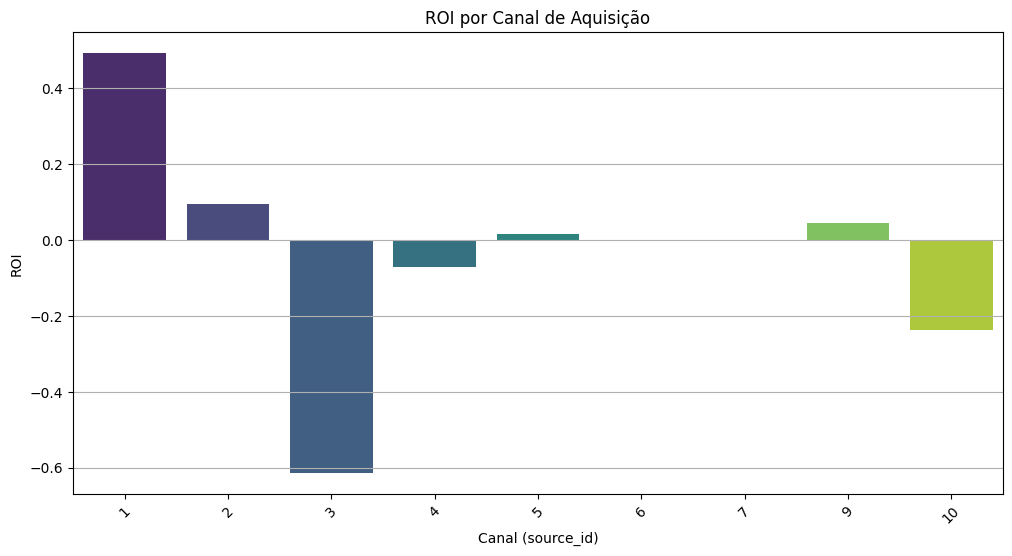

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(data=marketing_perf.sort_values('ROI', ascending=False), x='Source Id', y='ROI', palette='viridis')
plt.title('ROI por Canal de Aquisição')
plt.xlabel('Canal (source_id)')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [128]:
# Certifique-se que a coluna Buy Ts está em datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Criar coluna 'order_month' com ano-mês do pedido
orders['order_month'] = orders['Buy Ts'].dt.to_period('M')

# Obter mês da primeira compra de cada usuário
first_order_month = orders.groupby('Uid')['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})

# Mesclar para ter primeira compra em cada linha do pedido
cohort = pd.merge(orders, first_order_month, on='Uid')

# Calcular diferença em meses entre pedido e primeira compra
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))

# Agrupar para obter receita total e número de compradores por coorte e mês
cohorts = cohort.groupby(['first_order_month', 'order_month']).agg(
    revenue=('Revenue', 'sum'),
    n_buyers=('Uid', 'nunique')
).reset_index()

# Calcular tempo de vida do coorte em meses
cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

# Ordenar para visualização
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])


In [129]:
# Ajustar coluna de data dos custos e agrupar por mês
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_month'] = costs['dt'].dt.to_period('M')

cost_per_month = costs.groupby('costs_month').agg(
    costs=('costs', 'sum')
).reset_index()


In [130]:
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month', how='left')

# Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']


In [131]:
# Pivot table para ROMI
romi_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
).round(2)

# Pivot para LTV acumulado
ltv_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='sum'
).fillna(0).cumsum(axis=1).round(2)

# Pivot para CAC acumulado
cac_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='cac',
    aggfunc='sum'
).fillna(0).cumsum(axis=1).round(2)

# ROMI acumulado
romi_cumsum = romi_pivot.cumsum(axis=1).round(2)


In [132]:

romi_pivot.replace('', np.nan, inplace=True)
ltv_pivot.replace('', np.nan, inplace=True)
cac_pivot.replace('', np.nan, inplace=True)
romi_cumsum.replace('', np.nan, inplace=True)

print("Tabela Pivot ROMI:")
display(romi_pivot)

print("\nROMI acumulado:")
display(romi_cumsum)

print("\nLTV acumulado:")
display(ltv_pivot)

print("\nCAC acumulado:")
display(cac_pivot)


Tabela Pivot ROMI:


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.05,0.06,0.08,0.06,0.04,0.05,0.04,0.03,0.04,0.05,0.02
2017-07,0.63,0.04,0.05,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN
2017-08,0.49,0.03,0.02,0.01,0.02,0.01,0.01,0.02,0.02,0.01,NaN,NaN
2017-09,0.60,0.08,0.04,0.27,0.03,0.05,0.06,0.03,0.02,NaN,NaN,NaN
2017-10,0.60,0.06,0.02,0.02,0.02,0.02,0.02,0.02,NaN,NaN,NaN,NaN
2017-11,0.55,0.04,0.02,0.04,0.02,0.01,0.02,NaN,NaN,NaN,NaN,NaN
2017-12,0.54,0.03,0.12,0.15,0.06,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.03,0.03,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.46,0.03,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



ROMI acumulado:


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.58,0.64,0.72,0.78,0.82,0.87,0.91,0.94,0.98,1.03,1.05
2017-07,0.63,0.67,0.72,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,NaN
2017-08,0.49,0.52,0.54,0.55,0.57,0.58,0.59,0.61,0.63,0.64,NaN,NaN
2017-09,0.60,0.68,0.72,0.99,1.02,1.07,1.13,1.16,1.18,NaN,NaN,NaN
2017-10,0.60,0.66,0.68,0.70,0.72,0.74,0.76,0.78,NaN,NaN,NaN,NaN
2017-11,0.55,0.59,0.61,0.65,0.67,0.68,0.70,NaN,NaN,NaN,NaN,NaN
2017-12,0.54,0.57,0.69,0.84,0.90,0.97,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.45,0.48,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



LTV acumulado:


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,20.82,38.53,74.29,97.80,120.01,151.02,176.05,195.35,222.58,248.26,258.07
2017-07,6.01,18.41,39.44,50.23,57.17,65.06,71.48,78.48,85.86,98.72,110.24,110.24
2017-08,5.28,16.43,28.28,40.46,57.38,69.52,79.14,91.75,112.82,121.13,121.13,121.13
2017-09,5.64,27.83,41.28,179.95,199.83,225.92,253.36,270.32,281.37,281.37,281.37,281.37
2017-10,5.00,16.29,23.04,30.46,37.53,44.79,51.36,58.84,58.84,58.84,58.84,58.84
2017-11,5.15,12.49,19.28,31.79,39.25,43.83,51.39,51.39,51.39,51.39,51.39,51.39
2017-12,4.74,12.55,51.92,100.06,127.49,151.01,151.01,151.01,151.01,151.01,151.01,151.01
2018-01,4.14,12.86,25.22,36.42,41.12,41.12,41.12,41.12,41.12,41.12,41.12,41.12
2018-02,4.16,12.77,17.71,24.65,24.65,24.65,24.65,24.65,24.65,24.65,24.65,24.65



CAC acumulado:


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,8.91,307.93,603.74,1055.02,1467.78,2033.57,2651.56,3364.72,3928.91,4604.80,5100.12,5519.45
2017-07,9.49,293.92,721.44,1288.99,2062.62,3070.92,4001.99,4841.04,5565.21,6578.37,7433.15,7433.15
2017-08,10.80,430.95,1116.29,1977.83,2935.71,3983.17,5073.93,5765.19,6938.32,7655.23,7655.23,7655.23
2017-09,9.44,288.85,667.93,1185.70,1830.29,2341.59,2802.42,3404.84,3921.68,3921.68,3921.68,3921.68
2017-10,8.37,192.39,503.90,868.23,1220.09,1642.52,2040.55,2372.25,2372.25,2372.25,2372.25,2372.25
2017-11,9.29,181.88,461.20,769.91,1145.41,1609.77,1968.22,1968.22,1968.22,1968.22,1968.22,1968.22
2017-12,8.74,238.32,556.02,869.58,1315.37,1668.13,1668.13,1668.13,1668.13,1668.13,1668.13,1668.13
2018-01,9.94,296.98,663.43,1181.79,1675.66,1675.66,1675.66,1675.66,1675.66,1675.66,1675.66,1675.66
2018-02,8.96,266.72,651.02,1220.87,1220.87,1220.87,1220.87,1220.87,1220.87,1220.87,1220.87,1220.87


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>

Aqui precisamos calcular o `ROI` / `ROMI` também por cohort, pois os grupos podem ter valores diferentes de `LTV` e isso pode influenciar no resultado final. O cálculo da métrica pode ser feito como algo assim:
    
```python
your_agg_df['romi'] = your_agg_df['ltv'] / your_agg_df['cac']
```

O resultado pode ser apresentado como uma `pivot_table` por `cohort`, conforme você fez para outros indicadores em seu projeto. Adicionalmente, você pode analisar o `ROMI` por origem.
    
```markdown
|                   |      |    |    |   |   |   |   |   |   |   |    |    |
|-------------------|------|----|----|---|---|---|---|---|---|---|----|----|
| cohort            | 0    | 1  | 2  | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
| first_order_month |      |    |    |   |   |   |   |   |   |   |    |    |
| 2017-06           | 0.53 | .. | .. |   |   |   |   |   |   |   |    |    |
| 2017-07           | 0.63 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-08           | 0.49 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-09           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-10           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-11           | 0.55 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-12           | 0.54 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-01           | 0.42 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-02           | 0.46 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-03           | 0.56 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-04           | 0.48 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-05           | 0.63 |    |    |   |   |   |   |   |   |   |    |    |
 ```
    
Exemplo de código:    
```python
cohorts = orders_log.groupby(['first_order_month', 'order_month']).agg(revenue=('revenue','sum'), n_buyers=('user_id', 'nunique')).reset_index()

# calcular a vida útil do coorte
cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

# ordenar o dataframe por 'first_order_month' e 'cohort_lifetime'
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

# mesclar com os dados de custos
costs['costs_month'] = pd.to_datetime(costs['ad_date']).dt.to_period('M')
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month')

# calcular cac, ltv e romi
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

# criar a tabela dinâmica com 'cohort_lifetime' como colunas
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean').round(2)

# calcular a soma acumulada usando o comando cumsum
...continue o código
```

</div>

# Resumo da Análise de Marketing

Os canais 1 e 2 são os mais eficazes, apresentando ROI positivo e bom retorno sobre o investimento. Já os canais 3 e 4 geram prejuízo e precisam de revisão urgente para otimização dos custos. Canais com dados insuficientes devem ser avaliados quanto à sua relevância e possível descontinuação. Recomenda-se focar investimentos nos canais mais rentáveis para maximizar o retorno.

